# **Pre-Processing**


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Configure pandas to display all columns
pd.set_option("display.max_columns", None)

df_cluster = pd.read_csv("bank_marketing_dataset.csv")

numerical_cols_c = df_cluster.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cluster.select_dtypes(include=['object']).columns
duration_col = ['duration']  # Column to log transform

df_cluster = df_cluster.drop(columns=['nr.employed', 'emp.var.rate'])

numerical_cols_c = df_cluster.select_dtypes(include=['int64', 'float64']).columns

X_preprocessed_df = df_cluster.copy()
X_preprocessed_df['duration'] = np.log1p(df_cluster['duration'])

scaler = StandardScaler()
X_preprocessed_df[numerical_cols_c] = scaler.fit_transform(X_preprocessed_df[numerical_cols_c])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_preprocessed_df[categorical_cols]),
                                   columns=encoder.get_feature_names_out(categorical_cols),
                                   index=X_preprocessed_df.index)

X_no_encoded = X_preprocessed_df.copy()

X_preprocessed_df.drop(columns=categorical_cols, inplace=True)

X_preprocessed_df = pd.concat([X_preprocessed_df, X_cat_encoded], axis=1)

print(X_preprocessed_df.shape)

X_preprocessed_df.head()

(41188, 63)


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,1.533034,0.431124,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.628993,-0.177114,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.290186,0.274738,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.002309,-0.162669,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.533034,0.607534,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [15]:
prefixes = ['job_', 'marital_', 'education_', 'default_', 'housing_', 'loan_', 'contact_', 'month_', 'day_of_week_', 'poutcome_', 'subscribed_']
one_hot_cols = [col for col in X_preprocessed_df.columns if any(col.startswith(prefix) for prefix in prefixes)]

In [16]:
continuous_data = X_preprocessed_df.drop(columns=one_hot_cols, axis=1)
continuous_data_sample = continuous_data.sample(frac=0.5, random_state=42)
import gc
gc.collect()
# To float32
X = continuous_data_sample.values
X = X.astype(np.float32)

# **Affinity Propagation**

In [17]:
# Affinity Propagation
from sklearn.cluster import AffinityPropagation
  
affinity_model = AffinityPropagation().fit(X)
cluster_centers_indices = affinity_model.cluster_centers_indices_
labels = affinity_model.labels_
n_clusters_ = len(cluster_centers_indices)

print("Number of clusters detected by the algorithm:", n_clusters_)

# Evaluate the clusters
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

print(silhouette_score(X, labels), calinski_harabasz_score(X, labels), davies_bouldin_score(X, labels))


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Number of clusters detected by the algorithm: 525
0.18810128 943.570100426878 1.1314803824758235


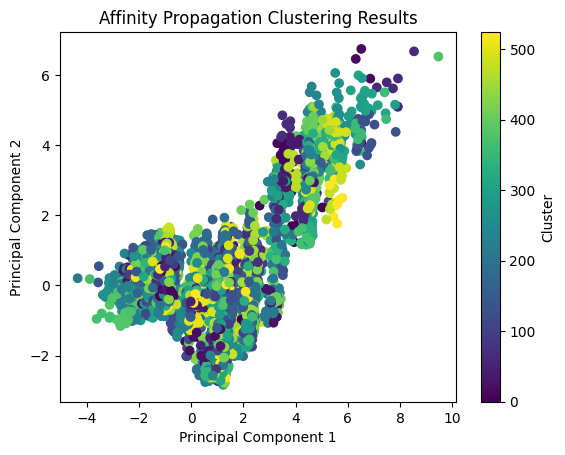

In [18]:
# Visualize the clusters if the data is 2D (using PCA)

from sklearn.decomposition import PCA

if X.shape[1] > 2:
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.title('Affinity Propagation Clustering Results')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

In [19]:
# Cluster Analysis (descriptive statistics using describe() and groupby() functions

continuous_data_sample['cluster'] = labels

continuous_data_sample = continuous_data_sample.groupby('cluster').describe().T
continuous_data_sample

cluster                0          1          2         3          4    \
age       count  52.000000  63.000000  22.000000  7.000000  24.000000   
          mean   -0.277268  -1.242159   1.153560  0.737946  -0.881932   
          std     0.251403   0.264373   0.301240  0.928233   0.173666   
          min    -0.769980  -1.825529   0.669404 -0.482104  -1.249775   
          25%    -0.482104  -1.441693   0.885311  0.045671  -0.985888   
...                    ...        ...        ...       ...        ...   
euribor3m min     0.768963   0.770116  -1.370650 -1.370650  -1.300886   
          25%     0.771846   0.772134  -1.355803 -1.338939  -1.277824   
          50%     0.772422   0.772999  -1.343551 -1.307228  -1.276382   
          75%     0.772999   0.773575  -1.321786 -1.307228  -1.259085   
          max     0.776458   0.776458  -1.277824  0.262167  -1.224204   

cluster                 5           6          7         8           9    \
age       count  105.000000  132.000000  17.000000  4.000000  101.000000   
          mean     0.026936   -0.203677   1.420141  0.477486   -1.239324   
          std      0.166272    0.246967   0.589811  0.000000    0.217935   
          min     -0.194227   -0.961898   0.285568  0.477486   -1.825529   
          25%     -0.098268   -0.386145   0.957281  0.477486   -1.441693   
...                     ...         ...        ...       ...         ...   
euribor3m min      0.711307    0.711307  -1.694676  0.775305    0.714190   
          25%      0.711883    0.711883  -1.632408  0.775737    0.770692   
          50%      0.712460    0.712460  -1.591472  0.775881    0.772422   
          75%      0.713036    0.713613  -1.581670  0.776026    0.773575   
          max      0.716496    0.716496  -1.566680  0.776458    0.776458   

cluster                10        11         12        13         14   \
age       count  36.000000  8.000000  87.000000  7.000000  80.000000   
          mean    0.133633  0.717383   0.304319  2.040246  -0.570866   
          std     0.351174  0.125640   0.239043  0.761075   0.229924   
          min    -0.482104  0.573445  -0.098268  1.341116  -0.961898   
          25%    -0.098268  0.573445   0.093650  1.341116  -0.769980   
...                    ...       ...        ...       ...        ...   
euribor3m min     0.770116  0.776458   0.772999 -1.527474  -1.370650   
          25%     0.771846  0.776458   0.773863 -1.518825  -1.357965   
          50%     0.772710  0.776458   0.774728 -1.506718  -1.343551   
          75%     0.773575  0.776746   0.775305 -1.491439  -1.321786   
          max     0.776458  0.777611   0.777611 -1.486538  -1.254761   

cluster               15         16         17         18         19   \
age       count  4.000000  40.000000  60.000000  15.000000  72.000000   
          mean   4.027967   0.916498  -0.221415  -1.089844  -1.140489   
          std    0.359045   0.133757   0.310612   0.507335   0.397221   
          min    3.548172   0.669404  -0.769980  -1.825529  -1.921488   
          25%    3.908018   0.765363  -0.482104  -1.345734  -1.441693   
...                   ...        ...        ...        ...        ...   
euribor3m min   -1.694676   0.711307   0.768963  -1.527474  -1.454251   
          25%   -1.610354   0.712316   0.771846  -1.523150  -1.361425   
          50%   -1.581670   0.712460   0.772999  -1.494610  -1.360848   
          75%   -1.526321   0.712460   0.773575  -1.487115  -1.357965   
          max   -1.362001   0.714190   0.776458  -1.482502  -1.349317   

cluster                20         21         22        23         24   \
age       count  61.000000  39.000000  13.000000  1.000000  81.000000   
          mean   -1.197863   0.809651   0.927755  0.285568   0.909893   
          std     0.272301   0.190455   0.120010       NaN   0.344693   
          min    -1.921488   0.477486   0.765363  0.285568   0.381527   
          25%    -1.441693   0.717383   0.861322  0.285568   0.669404   
...                    ...    